## 2.1 Adding a tree object to the scene
In this section we will add a <code>.obj</code> file that contains a tree object

In [1]:
from __future__ import print_function, division
import os
from run_start import *
from hips import hips2img
%matplotlib inline

## What does a <code>.obj</code> that contains a tree look like?
An <code>.obj</code> that contains a single tree can be very long - the below example has 289,000+ lines.  However, most of these are clones of the first few objects in the file. There are a number of ways of creating a <code>.obj</code>  file such as using the proprietry software Onyx tree.

We will use the <code><span style="background-color: lightgrey">obj/birch_tree.obj</span></code> as the basis of these examples.  A qucik look at the first few lines of this file.

### Creating objects with facets

Lets have a look at the a leaf object from :

<code>
    g leaf_example
    usemtl Leaf1
    v -0.171903 -0.116014 2.692959 <span style="color:green"><i># v creates a vector with coordinates x y z</i></span>
    !local -1 0.5 0
    v -0.169273 -0.099927 2.678257
    !local -1 1 0.42356
    v -0.154035 -0.110306 2.658874
    !local -1 0.5 1
    f -3 -2 -1 <span style="color:green"><i># f puts the trailing (-3 -2 -1) v together into a facet</i></span>
    usemtl Leaf1
    v -0.171903 -0.116014 2.692959
    !local -1 0.5 0
    v -0.154035 -0.110306 2.658874
    !local -1 0.5 1
    v -0.162335 -0.128205 2.677285
    !local -1 0 0.42356
    f -3 -2 -1 <span style="color:green"><i># another facet therefore we have a square (or diamond) shaped leaf</i></span>
    !}
</code>

If adding more than one lead we need to wrap the leaves in an object (g) and then clone the whole thing

<code>
    mtllib materials.matlib
    !{ <span style="color:green"><i># ground plane as usual</i></span>
    usemtl white
    v 0 0 0
    v 0 0 1
    plane -1 -2
    !}
    !{ <span style="color:green"><i># define our object called </i>tree</span>
    g tree
    !{ <span style="color:green"><i># define our leaf object </i>leaf_a</span>
    ... <span style="color:green"><i># leaf code from above</span>
    !}
    !}
    {! <span style="color:green"><i># clone our </i>tree<i> object (which currently consists of one leaf!)</i></span>
    clone 0 0 0 0 tree
    !}
</code>

In [2]:
# to run obj blocks interactively
def run_code(code):
    # writes code string to temporary file
    with open('obj/obj_example.obj', 'w') as O:
        O.write(code)

    # runs start
    cmd = "echo 16 0 0 3 1 1 512 512 1 output/obj_example.hips | \
           start obj/obj_example.obj"
    error = run_start(cmd)

    # displays hips image output
    if not error:
        hips2img('output/obj_example.hips', stretch=False)

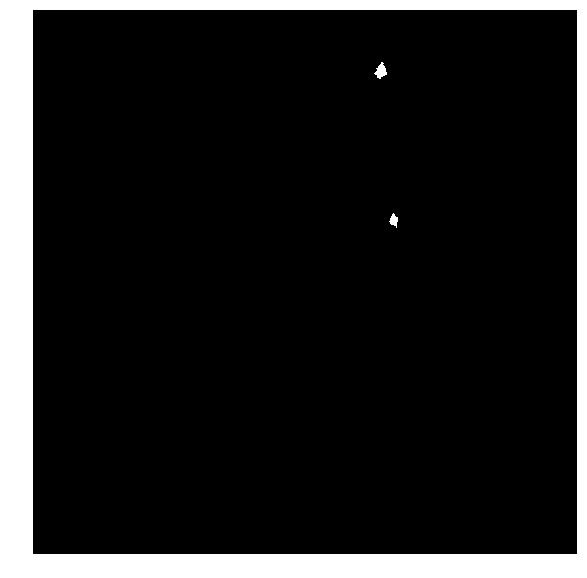

In [3]:
code = """
mtllib materials.matlib
!{
usemtl white
v 0 0 0
v 0 0 1
plane -1 -2
!}
!{
g tree
!{
g box leaf_A
usemtl Leaf1
v -0.171903 -0.116014 2.692959
!local -1 0.5 0
v -0.169273 -0.099927 2.678257
!local -1 1 0.42356
v -0.154035 -0.110306 2.658874
!local -1 0.5 1
f -3 -2 -1
usemtl Leaf1
v -0.171903 -0.116014 2.692959
!local -1 0.5 0
v -0.154035 -0.110306 2.658874
!local -1 0.5 1
v -0.162335 -0.128205 2.677285
!local -1 0 0.42356
f -3 -2 -1
!}
!{
g box leaf_B
usemtl Leaf1
v -0.137291 -0.371732 2.700421
!local -1 0.5 0
v -0.127707 -0.385015 2.691488
!local -1 1 0.385223
v -0.142031 -0.404086 2.682208
!local -1 0.5 1
f -3 -2 -1
usemtl Leaf1
v -0.137291 -0.371732 2.700421
!local -1 0.5 0
v -0.142031 -0.404086 2.682208
!local -1 0.5 1
v -0.150632 -0.384091 2.696964
!local -1 0 0.385223
f -3 -2 -1
!}
!}
{!
clone 0 0 0 0 tree
!}
"""
run_code(code)

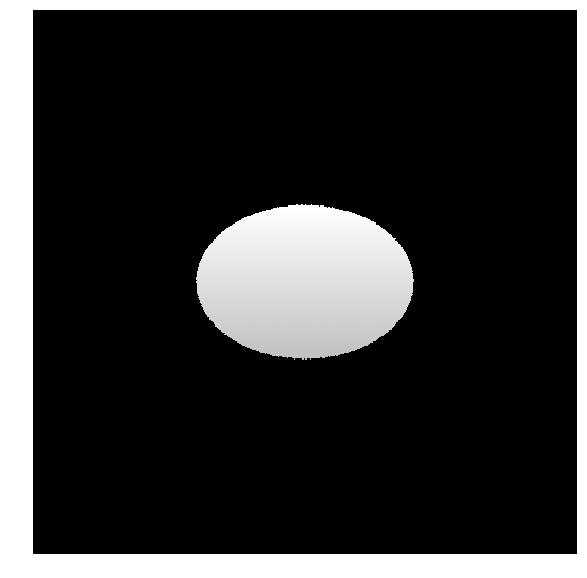

In [4]:
code = """
mtllib materials.matlib
!{
usemtl white
v 0 0 0
v 0 0 1
plane -1 -2
!}
!{
g tree
!{
g leaf_A
usemtl Leaf1
v 0 1 1 # x y z for changing orientation 
v 0 0 1 # x y z for changing position
disk -1 -2 .2 # last variable alters radius
!}
!}
{!
clone 0 0 0 0 tree
!}
"""
run_code(code)

### Trees from facets
In the below example we render the whole <code>.obj</code> file which is just a collection of many many vertices!

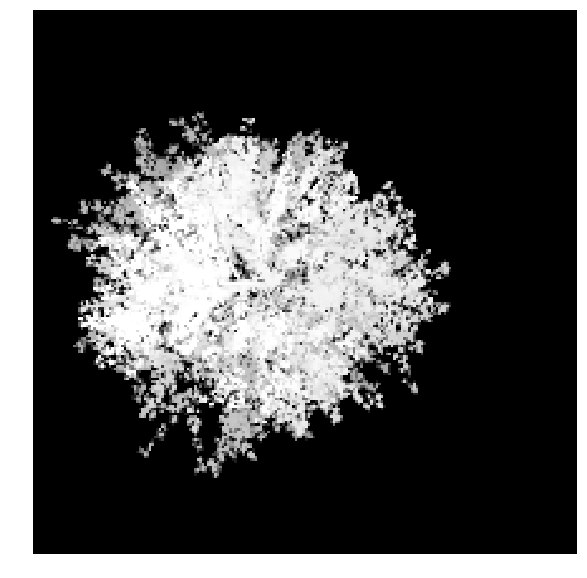

In [5]:
# check the terminal window running iPython for progress
cmd = "echo 16 0 0 20 2 2 216 216 6 output/single_birch.hips | start -v obj/birch_tree_scene.obj"
error = run_start(cmd)

if not error:
    hips2img('output/single_birch.hips', order=[0])